In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.linalg
import scipy.fft as spfft
# import scipy.ndimage as spimg
# import cvxpy as cvx

In [35]:
N = 1000
t = np.linspace(0, np.pi, N)
x = np.sum([np.sin(2*np.pi*f*t + 2*np.pi/f) for f in [1,3,5]], axis=0)

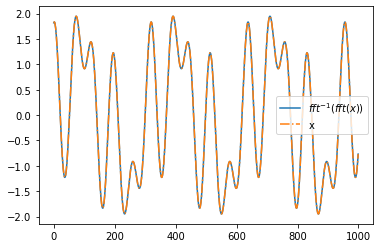

In [62]:
y = spfft.ifft(spfft.fft(x))
plt.plot(y.real, label=r'$fft^{-1}(fft(x))$')
plt.plot(x, '-.', label='x')
plt.legend()

dif of max 3891.614441289554


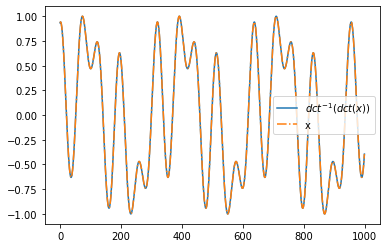

In [63]:
y = spfft.idct(spfft.dct(x))
print('dif of max', y.max() - x.max())
plt.plot(y / y.max(), label=r'$dct^{-1}(dct(x))$')
plt.plot(x / x.max(), '-.', label='x')
plt.legend()

In [16]:
dft = lambda N: N**2
fft = lambda N: N * np.log2(N)
for i in np.arange(1, 6):
    N = 10**i
    print('N: 10^%i, \tdft: 10^%i\tfft: 10^%i' % (N, np.log10(dft(N)), np.log10(fft(N))))

N: 10^10, 	dft: 10^2	fft: 10^1
N: 10^100, 	dft: 10^4	fft: 10^2
N: 10^1000, 	dft: 10^6	fft: 10^3
N: 10^10000, 	dft: 10^8	fft: 10^5
N: 10^100000, 	dft: 10^10	fft: 10^6


In [32]:
# O(MC) == O(dft) = O(NM), but accuracy is higher
fft = lambda N: N * np.log2(N)
print('O(fft) == O(dft)\n')
print('O \tN_fft \tN_MC \tacc(fft) \tacc(MC)')
for i in np.arange(3, 8):
    O = fft(10**i)
    print('10^%i \t10^%i \t 10^%i \t?\t\t?' % (np.log10(O), i, np.log10(np.sqrt(O))))

O(fft) == O(dft)

O 	N_fft 	N_MC 	acc(fft) 	acc(MC)
10^3 	10^3 	 10^1 	?		?
10^5 	10^4 	 10^2 	?		?
10^6 	10^5 	 10^3 	?		?
10^7 	10^6 	 10^3 	?		?
10^8 	10^7 	 10^4 	?		?
